In [1]:
import numpy as np
from matplotlib import font_manager
from matplotlib import pyplot as plt
import os 
import scipy
import math
from astropy.cosmology import Planck18 as cosmo
from pyfonts import load_google_font
from pypalettes import load_cmap
from matplotlib.font_manager import FontProperties

#This is used to set initial conditions (densities at z = 1090) for the cascade.

def InitialConditions(h):
    #Constants
    G = 6.67430e-11       #m^3 kg^-1 s^-2
    MetersPerMpc = 3.086e22  #Meters per Mpc
    z_rec = 1090          #Redshift at recombination

    #Derived parameters
    H0 = 100*h           #km/s/Mpc
    H0_SI = H0*1000/MetersPerMpc  #s^-1
    rho_crit_0 = 3*(H0_SI**2)/(8*np.pi*G)  #Critical density today, kg/m^3
    Omega_r = (4.15e-5)/(h**2)  #Radiation density parameter (photons + neutrinos), from Dodelson 
    Omega_matter_total = 0.14241/(h**2)
    Omega_EDM = Omega_matter_total*0.85*0.20 #Assume Omega_EDM is 20 percent of Omega_DM, where I assume DM is 85 percent of the total matter density  
    Omega_m = Omega_matter_total - Omega_EDM #Matter that is not EDM
    Omega_Lambda = 1.0 - Omega_m - Omega_EDM - Omega_r #Dark energy density for flatness 

    #Density parameters at z=1090
    rho_EDM_initial = Omega_EDM*rho_crit_0*((1 + z_rec)**3)  #Total exotic dark matter density (the cascade fields A, B, C, D)
    rho_m_initial = Omega_m*rho_crit_0*((1 + z_rec)**3) #Total matter density (except cascade fields A, B, C, D)
    rho_r_initial = Omega_r*rho_crit_0*((1 + z_rec)**4) #Radiation density
    rho_Lambda_initial = Omega_Lambda*rho_crit_0  #Dark energy density, is constant with redshift 
    return rho_EDM_initial, rho_m_initial, rho_r_initial, rho_Lambda_initial

In [2]:
#This is used to set initial conditions (densities at z = 1090) for Lambda-CDM.

def InitialConditions_No_EDM(h):
    #Constants
    G = 6.67430e-11       #m^3 kg^-1 s^-2
    MetersPerMpc = 3.086e22  #meters per Mpc
    z_rec = 1090          #Redshift at recombination

    #Derived parameters
    H0 = 100*h           #km/s/Mpc
    H0_SI = H0*1000/MetersPerMpc  #s^-1
    rho_crit_0 = 3*(H0_SI**2)/(8*np.pi*G)  #Critical density today, kg/m^3
    Omega_r = (4.15e-5)/(h**2)  #Radiation density parameter (photons + neutrinos), from Dodelson 
    Omega_m = 0.14241/(h**2)
    Omega_Lambda = 1.0 - Omega_m - Omega_r #Dark energy density for flatness 

    #Density parameters at z=1090
    rho_m_initial = Omega_m*rho_crit_0*((1 + z_rec)**3)  #Total matter density
    rho_r_initial = Omega_r*rho_crit_0*((1 + z_rec)**4)  #Radiation density
    rho_Lambda_initial = Omega_Lambda*rho_crit_0  #Dark energy density, is constant with redshift 
    return rho_m_initial, rho_r_initial, rho_Lambda_initial

In [3]:
"""
Here we set up the formatting of our plots by loading fonts and colors. 
"""

for fontpath in font_manager.findSystemFonts(fontpaths=None, fontext="ttf"):
    if 'Urbanist'.lower() in fontpath.lower():
        print(fontpath)

#Change this to your path
personal_path = "/home/hoelsczj/Library/static/"

#Get normal font and store it in `urbanist-Light`
font_path = personal_path + "Urbanist-Regular.ttf"
font_manager.fontManager.addfont(font_path)
urbanist= FontProperties(fname=font_path)

#Get bold font and store it in `urbanist_bold`
font_path = personal_path + "Urbanist-Bold.ttf"
font_manager.fontManager.addfont(font_path)
urbanist_bold = FontProperties(fname=font_path)

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.sans-serif'] = urbanist.get_name()
SMALL_SIZE = 18
MEDIUM_SIZE = 18 #These can be adjusted. Here we just use 18. 
BIGGER_SIZE = 18

plt.rc('font', family="urbanist", size=SMALL_SIZE)          #Controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     #Fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE, lw=2)    #Fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    #Fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    #Fontsize of the tick labels
plt.rcParams['xtick.minor.width']=2   
plt.rcParams['xtick.major.width']=2 
plt.rc('legend', fontsize=SMALL_SIZE)    #Legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  #Fontsize of the figure title

cmap = load_cmap("PurpleGreens") #Loading colors

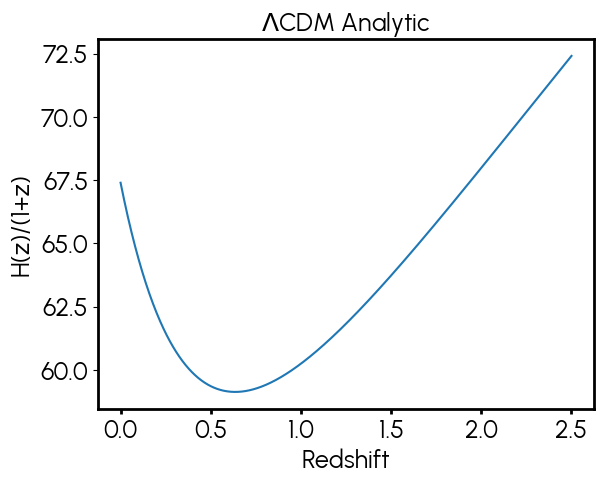

With No Exotic Dark Matter, Values at z = 0: 
Omega_m: 
0.3121973851075923
Omega_r: 
9.061444030764565e-05
Omega_Lambda: 
0.6877120004521002
Hubble Constant (km/(sec Mpc)): 
67.33669798854244
Total Energy Density: 
8.5150550453269e-27
 


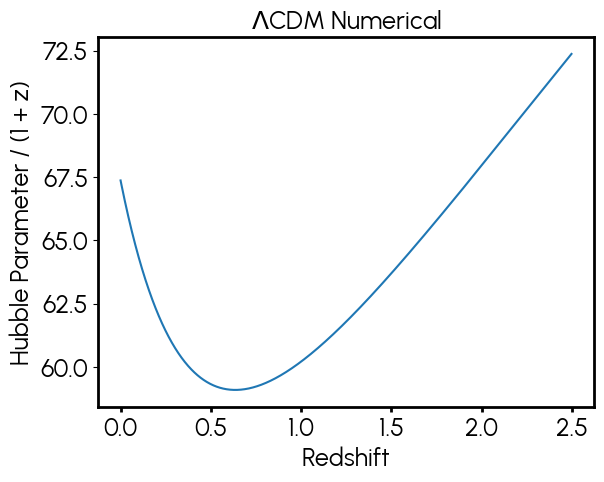

In [4]:
"""
Here we compute H(z) for Lambda-CDM numerically and analytically. We see there is an excellent match.
One could use more sophisticated methods for numerically integrating the differential equations, though
since the match to the analytic case is good, this complication is not necessary. 
"""

MetersPerParsec = 3.086*(10**(16))
MetersPerMpc = (10**6)*MetersPerParsec
G = 6.6743*(10**(-11)) #m^3 kg^−1 s^−2
H0UnitConversion = 1000/MetersPerMpc

h = 0.674
H0 = 100*h           #km/s/Mpc
H0_SI = H0*1000/MetersPerMpc  #s^-1
rho_crit_0 = 3*(H0_SI**2)/(8*np.pi*G)  #Critical density today, kg/m^3
Omega_r = (4.15e-5)/(h**2)  #Radiation density parameter (photons + neutrinos), from Dodelson 
Omega_m = 0.14241/(h**2)
Omega_Lambda = 1.0 - Omega_m - Omega_r #Dark energy density for flatness 

rho_m_initial, rho_r_initial, rho_Lambda_initial = InitialConditions_No_EDM(h)

#Analytic computation 
z_vals = np.linspace(0, 2.5, 1000)
Hz_vals = [H0*np.sqrt(Omega_m*(1+z)**3 + Omega_r*(1+z)**4 + Omega_Lambda) for z in z_vals]
Hz1pz = [H/(1+z) for H,z in zip(Hz_vals, z_vals)] #Dividing H(z) by 1+z for plotting. This has been done in the literature before. 

plt.plot(z_vals, Hz1pz)
plt.title(r"$\Lambda$CDM Analytic")
plt.xlabel("Redshift")
plt.ylabel("H(z)/(1+z)")
plt.show()

#Friedman Equation 
def H(z, rho_m, rho_r, rho_Lambda):
    rho_total = rho_m + rho_r + rho_Lambda
    return math.sqrt((8*math.pi*G/3)*(rho_total))

#Computes critical density 
def RhoCritical(z, rho_m, rho_r, rho_Lambda):
    Hval=H(z, rho_m, rho_r, rho_Lambda)
    return 3*Hval*Hval/(8*math.pi*G) 

#Note: dt/dz = -1/(H(z)*(1+z))

#Returns drho_r / dz 
def drhordz(z, rho_m, rho_r, rho_Lambda):
    Hval=H(z, rho_m, rho_r, rho_Lambda)
    return (-1/(Hval*(1+z)))*(-4*Hval*rho_r)

#Returns drho_m / dz 
def drhomdz(z, rho_m, rho_r, rho_Lambda):
    Hval=H(z, rho_m, rho_r, rho_Lambda)
    return (-1/(Hval*(1+z)))*(-3*Hval*rho_m)

#Setting initial conditions (at z = 1090)
rho_m = rho_m_initial
rho_r = rho_r_initial
rho_Lambda = rho_Lambda_initial
z = 1090 #Redshift at CMB formation 
dz = -0.001
HList_No_EDM=[]
zList_No_EDM=[]
#Euler's method, using it because it is simple 
while z>0:
    rho_r_old = rho_r
    rho_m_old = rho_m 
    rho_r = rho_r + dz*drhordz(z, rho_m_old, rho_r_old, rho_Lambda)
    rho_m = rho_m + dz*drhomdz(z, rho_m_old, rho_r_old, rho_Lambda)
    z = z + dz
    HList_No_EDM.append(H(z, rho_m, rho_r, rho_Lambda)/H0UnitConversion)
    zList_No_EDM.append(z)
    
RhoCrit=RhoCritical(z, rho_m, rho_r, rho_Lambda)
Omega_m=rho_m/RhoCrit
Omega_r=rho_r/RhoCrit    
print("With No Exotic Dark Matter, Values at z = 0: ")
print("Omega_m: ")
print(Omega_m)
print("Omega_r: ")
print(Omega_r)
print("Omega_Lambda: ")
print(rho_Lambda/RhoCrit)
H0New = H(z, rho_m, rho_r, rho_Lambda)/H0UnitConversion
print("Hubble Constant (km/(sec Mpc)): ")
print(H0New)
print("Total Energy Density: ")
print(rho_r + rho_m + rho_Lambda)
print(" ")

#H(z)/(1+z)
H1pzList_No_EDM=[]
for index in range(len(HList_No_EDM)):
    H1pzList_No_EDM.append(HList_No_EDM[index]/(1+zList_No_EDM[index]))
    
plt.plot(zList_No_EDM[-2500:-1], H1pzList_No_EDM[-2500:-1])
plt.title(r"$\Lambda$CDM Numerical")
plt.xlabel("Redshift")
plt.ylabel("Hubble Parameter / (1 + z)")
plt.show()

In [5]:
def ExoticDarkMatter(h_sample):
    # Constants
    G = 6.67430e-11  # m^3 kg^-1 s^-2
    MetersPerParsec = 3.086e16  # meters per parsec
    MetersPerMpc = (1e6)*MetersPerParsec  # meters per Mpc
    H0UnitConversion = 1000/MetersPerMpc

    #Friedman Equation 
    def H(rho_A, rho_B, rho_C, rho_D, rho_m, rho_r, rho_Lambda):
        rho_total = rho_A + rho_B + rho_C + rho_D + rho_m + rho_r + rho_Lambda
        return math.sqrt((8*math.pi*G/3)*(rho_total))

    #Returns the critical density 
    def RhoCritical(rho_A, rho_B, rho_C, rho_D, rho_m, rho_r, rho_Lambda):
        Hval=H(rho_A, rho_B, rho_C, rho_D, rho_m, rho_r, rho_Lambda)
        return 3*Hval*Hval/(8*math.pi*G) 
    
    #Note: dt/dz = -1/(H(z)*(1+z))
    
    #Returns drho_r / dz 
    def drhordz(z, rho_A, rho_B, rho_C, rho_D, rho_m, rho_r, rho_Lambda):
        Hval=H(rho_A, rho_B, rho_C, rho_D, rho_m, rho_r, rho_Lambda)
        return (-1/(Hval*(1+z)))*(-4*Hval*rho_r)
    
    #Returns drho_m / dz 
    def drhomdz(z, rho_A, rho_B, rho_C, rho_D, rho_m, rho_r, rho_Lambda):
        Hval=H(rho_A, rho_B, rho_C, rho_D, rho_m, rho_r, rho_Lambda)
        return (-1/(Hval*(1+z)))*(-3*Hval*rho_m)
    
    #Returns drho_A / dz 
    def drhoAdz(z, rho_A, rho_B, rho_C, rho_D, rho_m, rho_r, rho_Lambda, Gamma_A, Gamma_B, Gamma_C):
        w_A = 0 #Eqn of state parameter 
        Hval=H(rho_A, rho_B, rho_C, rho_D, rho_m, rho_r, rho_Lambda)
        return (-1/(Hval*(1+z)))*(-3*Hval*rho_A - 3*Hval*w_A*rho_A - Gamma_A*rho_A)
    
    #Returns drho_B / dz 
    def drhoBdz(z, rho_A, rho_B, rho_C, rho_D, rho_m, rho_r, rho_Lambda, Gamma_A, Gamma_B, Gamma_C):
        w_B = 1/12 #Eqn of state parameter 
        Hval=H(rho_A, rho_B, rho_C, rho_D, rho_m, rho_r, rho_Lambda)
        return (-1/(Hval*(1+z)))*(-3*Hval*rho_B - 3*Hval*w_B*rho_B + Gamma_A*rho_A - Gamma_B*rho_B)
    
    #Returns drho_C / dz 
    def drhoCdz(z, rho_A, rho_B, rho_C, rho_D, rho_m, rho_r, rho_Lambda, Gamma_A, Gamma_B, Gamma_C):
        w_C = -1/3 #Eqn of state parameter 
        Hval=H(rho_A, rho_B, rho_C, rho_D, rho_m, rho_r, rho_Lambda)
        return (-1/(Hval*(1+z)))*(-3*Hval*rho_C - 3*Hval*w_C*rho_C + Gamma_B*rho_B - Gamma_C*rho_C)
    
    #Returns drho_D / dz 
    def drhoDdz(z, rho_A, rho_B, rho_C, rho_D, rho_m, rho_r, rho_Lambda, Gamma_A, Gamma_B, Gamma_C):
        w_D = 1/12 #Eqn of state parameter 
        Hval=H(rho_A, rho_B, rho_C, rho_D, rho_m, rho_r, rho_Lambda)
        return (-1/(Hval*(1+z)))*(-3*Hval*rho_D - 3*Hval*w_D*rho_D + Gamma_C*rho_C)
    
    rho_A, rho_m, rho_r, rho_Lambda = InitialConditions(h_sample) #Obtaining densities at z = 1090 
    rho_B = 0 #B, C, and D are not present until produced via decays
    rho_C = 0
    rho_D = 0
    z = 1090 #Redshift at CMB formation 
    dz = -0.001
    HList_EDM=[]
    zList_EDM=[]
    #Euler's method, using it because it is simple 
    while z>0:
        rho_r_old = rho_r
        rho_m_old = rho_m 
        rho_A_old = rho_A 
        rho_B_old = rho_B 
        rho_C_old = rho_C 
        rho_D_old = rho_D 

        #Determines the decay rates as a function of redshift. (Decays turn on when U(1)'s are broken.)
        if z >= 3:
            Gamma_A = 0
            Gamma_B = 0
            Gamma_C = 0
        if 1.5 <= z < 3:
            Gamma_A = 10**(-15)
            Gamma_B = 0
            Gamma_C = 0
        if 0.6 <= z < 1.5:
            Gamma_A = 10**(-15)
            Gamma_B = 10**(-15)
            Gamma_C = 0
        if 0<= z < 0.6: 
            Gamma_A = 10**(-15)
            Gamma_B = 10**(-15)
            Gamma_C = 10**(-15)
        
        #Evolves radiation and matter that is not A, B, C, or D.
        rho_r = rho_r_old + dz*drhordz(z, rho_A_old, rho_B_old, rho_C_old, rho_D_old, rho_m_old, rho_r_old, rho_Lambda)
        rho_m = rho_m_old + dz*drhomdz(z, rho_A_old, rho_B_old, rho_C_old, rho_D_old, rho_m_old, rho_r_old, rho_Lambda)

        #Models evolution of components A, B, C, and D, and decays between them. 
        #Here we have decays, where we prevent any negative densities. (Decay stops when decaying field is depleted totally.)
        if (rho_A_old + dz*drhoAdz(z, rho_A_old, rho_B_old, rho_C_old, rho_D_old, rho_m_old, rho_r_old, rho_Lambda, Gamma_A, Gamma_B, Gamma_C)) > 0:
            rho_A = rho_A_old + dz*drhoAdz(z, rho_A_old, rho_B_old, rho_C_old, rho_D_old, rho_m_old, rho_r_old, rho_Lambda, Gamma_A, Gamma_B, Gamma_C)
        else:
            rho_A = 0
            rho_A_old = 0 #Prevents sourcing B from A when this would result in negative rho_A

        if (rho_B_old + dz*drhoBdz(z, rho_A_old, rho_B_old, rho_C_old, rho_D_old, rho_m_old, rho_r_old, rho_Lambda, Gamma_A, Gamma_B, Gamma_C)) > 0:
            rho_B = rho_B_old + dz*drhoBdz(z, rho_A_old, rho_B_old, rho_C_old, rho_D_old, rho_m_old, rho_r_old, rho_Lambda, Gamma_A, Gamma_B, Gamma_C)
        else:
            rho_B = 0
            rho_B_old = 0 #Prevents sourcing C from B when this would result in negative rho_B

        if (rho_C_old + dz*drhoCdz(z, rho_A_old, rho_B_old, rho_C_old, rho_D_old, rho_m_old, rho_r_old, rho_Lambda, Gamma_A, Gamma_B, Gamma_C)) > 0:
            rho_C = rho_C_old + dz*drhoCdz(z, rho_A_old, rho_B_old, rho_C_old, rho_D_old, rho_m_old, rho_r_old, rho_Lambda, Gamma_A, Gamma_B, Gamma_C)
        else:
            rho_C = 0
            rho_C_old = 0 #Prevents sourcing D from C when this would result in negative rho_C

        if (rho_D_old + dz*drhoDdz(z, rho_A_old, rho_B_old, rho_C_old, rho_D_old, rho_m_old, rho_r_old, rho_Lambda, Gamma_A, Gamma_B, Gamma_C)) > 0:
            rho_D = rho_D_old + dz*drhoDdz(z, rho_A_old, rho_B_old, rho_C_old, rho_D_old, rho_m_old, rho_r_old, rho_Lambda, Gamma_A, Gamma_B, Gamma_C)
        else:
            rho_D = 0

        z = z + dz
        
        #Appends Hubble parmeter and redshift to lists. 
        HList_EDM.append(H(rho_A, rho_B, rho_C, rho_D, rho_m, rho_r, rho_Lambda)/H0UnitConversion)
        zList_EDM.append(z)

    RhoCrit=RhoCritical(rho_A, rho_B, rho_C, rho_D, rho_m, rho_r, rho_Lambda)
    Omega_EDM=(rho_A + rho_B + rho_C + rho_D)/RhoCrit
    Omega_m=rho_m/RhoCrit
    Omega_r=rho_r/RhoCrit 

    Omega_A=rho_A/RhoCrit
    Omega_B=rho_B/RhoCrit
    Omega_C=rho_C/RhoCrit
    Omega_D=rho_D/RhoCrit
    Omega_Lambda = rho_Lambda/RhoCrit

    print('Omega A: ')
    print(Omega_A)
    print('Omega B: ')
    print(Omega_B)
    print('Omega C: ')
    print(Omega_C)
    print('Omega D: ')
    print(Omega_D)
    print('Omega m: ')
    print(Omega_m)
    print('Omega r: ')
    print(Omega_r)
    print('Omega Lambda: ')
    print(Omega_Lambda)
    print('Omega Total: ')
    print(Omega_A + Omega_B + Omega_C + Omega_D + Omega_r + Omega_m + Omega_Lambda)
   
    #Computes Hubble constant 
    H0New = H(rho_A, rho_B, rho_C, rho_D, rho_m, rho_r, rho_Lambda)/H0UnitConversion
   
    H1pzList_EDM=[] #Dividing H(z) by 1+z, useful for plotting later. 
    for index in range(len(HList_EDM)):
        H1pzList_EDM.append(HList_EDM[index]/(1+zList_EDM[index]))

    #Here we apply a cubic spline interpolation, useful for plotting things.
    Interpolated_H = scipy.interpolate.CubicSpline(np.flip(zList_EDM), np.flip(HList_EDM), axis=0, extrapolate=None)

    return zList_EDM, H0New, H1pzList_EDM, Interpolated_H

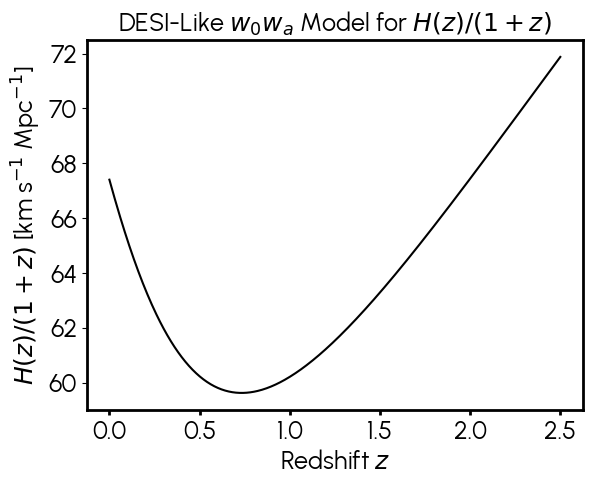

In [6]:
"""
Here we compute H(z) for w0waCDM and plot H(z)/(1+z).
"""

w0 = -0.83 #Approximate values favored by DESI 
wa = -0.62

h = 0.674
H0 = 100*h  #km/s/Mpc
H0_SI = H0*1000/MetersPerMpc  #s^-1
rho_crit_0 = 3*(H0_SI**2)/(8*np.pi*G)  #Critical density today, kg/m^3
Omega_r = (4.15e-5)/(h**2)  #Radiation density parameter (photons + neutrinos), from Dodelson 
Omega_m = 0.14241/(h**2)
Omega_Lambda = 1.0 - Omega_m - Omega_r #Dark energy density for flatness 

#Hubble parameter with w0waCDM
def H_of_z(z):
    Delta = (Omega_m*(1+z)**3 + Omega_r*(1+z)**4 + Omega_Lambda*((1+z)**(3*(1+w0+wa)))*np.exp(-3*wa*z/(1+z)))
    return H0*np.sqrt(Delta)

#Plot H(z)/(1+z) 
z = np.linspace(0, 2.5, 500)
Hz = H_of_z(z)
plt.plot(z, Hz/(1+z), color='k')
plt.xlabel(r"Redshift $z$")
plt.ylabel(r"$H(z)/(1+z)$ [km s$^{-1}$ Mpc$^{-1}$]")
plt.title(r"DESI-Like $w_0w_a$ Model for $H(z)/(1+z)$")
plt.show()

#Appends H(z) and redshift values to lists for later use. 
HList_DESI=[]
z = 1090
zListDESI = []
while z>=0:
    HList_DESI.append(H_of_z(z))
    zListDESI.append(z)
    z = z - 0.001


Omega A: 
8.566574400843508e-183
Omega B: 
6.924825159418935e-153
Omega C: 
7.070223269850665e-99
Omega D: 
0.06476502767512873
Omega m: 
0.25592449027156355
Omega r: 
8.949564568899828e-05
Omega Lambda: 
0.6792209864076189
Omega Total: 
1.0


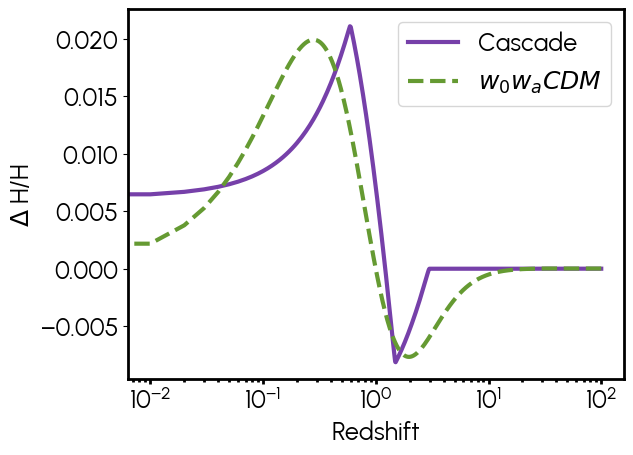

In [7]:
h = 0.674
#Here we apply a cubic spline interpolation, useful for plotting things below.
#Note that np.flip is used becuase the interpolator will throw an error if you feed it a list of z-values that goes from large numbers to small ones. 
Interpolated_H_No_EDM=scipy.interpolate.CubicSpline(np.flip(zList_No_EDM), np.flip(HList_No_EDM), axis=0, extrapolate=None)
Interpolated_H_EDM = ExoticDarkMatter(h)[3]
Interpolated_H_DESI=scipy.interpolate.CubicSpline(np.flip(zListDESI), np.flip(HList_DESI), axis=0, extrapolate=None)

zList=np.linspace(0, 100, 10000) #Redshifts between 0 and 100, for plotting 
zList=np.flip(zList)
#Below we compute the fractional change in H(z) as compared to Lambda CDM.
deltaH_H_Cascade = (Interpolated_H_EDM(zList) - Interpolated_H_No_EDM(zList))/Interpolated_H_No_EDM(zList) #With our cascade 
deltaH_H_DESI = (Interpolated_H_DESI(zList) - Interpolated_H_No_EDM(zList))/Interpolated_H_No_EDM(zList) #With w0waCDM
#Note that deltaH_H_Cascade is the Hubble parameter with EDM minus the Hubble parameter in Lambda-CDM (no EDM) divided by H with no EDM.

#Plotting fractional change in H 
plt.plot(zList, deltaH_H_Cascade, linewidth = 3, color=cmap(1), label='Cascade')
plt.plot(zList, deltaH_H_DESI, linewidth = 3, label=r'$w_0 w_a CDM$', color=cmap(6), linestyle='dashed')
plt.xlabel("Redshift")
plt.ylabel(r'$\Delta$ H/H')
plt.xscale("log")
plt.legend()
#plt.savefig('Symmetry_Breaking_Delta_H_Over_H.pdf')
plt.show()
